# 오버워치 2 점수판 분석 AI

In [1]:
import pandas as pd
from os import path

players = 10


def prepare_scoreboards(defeat_, draw_, victory_):
    scoreboards_ = pd.concat([defeat_, draw_, victory_])
    scoreboards_.set_index(
        pd.Index((i, j) for i in range(len(scoreboards_.index) // players) for j in range(players)), inplace=True
    )
    return scoreboards_


datapath = path.join('datasets', '')
range_ = range(3, 10)
defeat = pd.read_csv(datapath + 'defeat.csv', usecols=range_)
draw = pd.read_csv(datapath + 'draw.csv', usecols=range_)
victory = pd.read_csv(datapath + 'victory.csv', usecols=range_)
scoreboards = prepare_scoreboards(defeat, draw, victory)
scoreboards.loc[
    (
            scoreboards['E'] == 0
    ) & (
            scoreboards['A'] == 0
    ) & (
            scoreboards['D'] == 0
    ) & (
            scoreboards['DMG'] == 0
    ) & (
            scoreboards['H'] == 0
    ) & (
            scoreboards['MIT'] == 0
    ), 'D'
] = scoreboards['D'].max()
scoreboards

E  A   D    DMG      H   MIT    GAME
0   0   7  3   6   5933   1068  6199  DEFEAT
    1   7  0  10   3601    747     0  DEFEAT
    2   9  1   6   4352      0     0  DEFEAT
    3   7  7   2   2332   6325     0  DEFEAT
    4   6  4   2   3410   5979   606  DEFEAT
...    .. ..  ..    ...    ...   ...     ...
360 5   8  2   6  10201      0  8837  DEFEAT
    6  11  0  10   9693    960   228  DEFEAT
    7  13  4  12   7592      0     0  DEFEAT
    8   6  6  10   3341   8995  1174  DEFEAT
    9   2  7   4   1846  11774  1043  DEFEAT

[3610 rows x 7 columns]

In [2]:
scoreboards.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3610 entries, (0, 0) to (360, 9)
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   E       3610 non-null   int64 
 1   A       3610 non-null   int64 
 2   D       3610 non-null   int64 
 3   DMG     3610 non-null   int64 
 4   H       3610 non-null   int64 
 5   MIT     3610 non-null   int64 
 6   GAME    3610 non-null   object
dtypes: int64(6), object(1)
memory usage: 219.3+ KB


In [3]:
scoreboards.describe()

,E,A,D,DMG,H,MIT
count,3610.000000,3610.000000,3610.000000,3610.000000,3610.000000,3610.000000
mean,13.546537,7.217452,6.391136,6167.693075,3858.383102,2320.701662
std,10.010810,8.494327,4.035713,4549.406518,5572.322533,4647.377093
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,3.000000,2581.750000,0.000000,0.000000
50%,12.000000,4.000000,6.000000,5323.500000,693.000000,291.000000
75%,20.000000,12.000000,9.000000,9087.500000,7356.500000,1777.250000
max,58.000000,54.000000,21.000000,29354.000000,130174.000000,41849.000000


In [4]:
import matplotlib as mpl
import os
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
IMAGES_PATH = path.join('.', 'images')
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + '.' + fig_extension)
    print('그림 저장:' + fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, dpi=resolution, format=fig_extension)

In [5]:
tank = scoreboards[::players]
damage = pd.concat([scoreboards[1::players], scoreboards[2::players]])
support = pd.concat([scoreboards[3::players], scoreboards[4::players]])

그림 저장:tank_hist


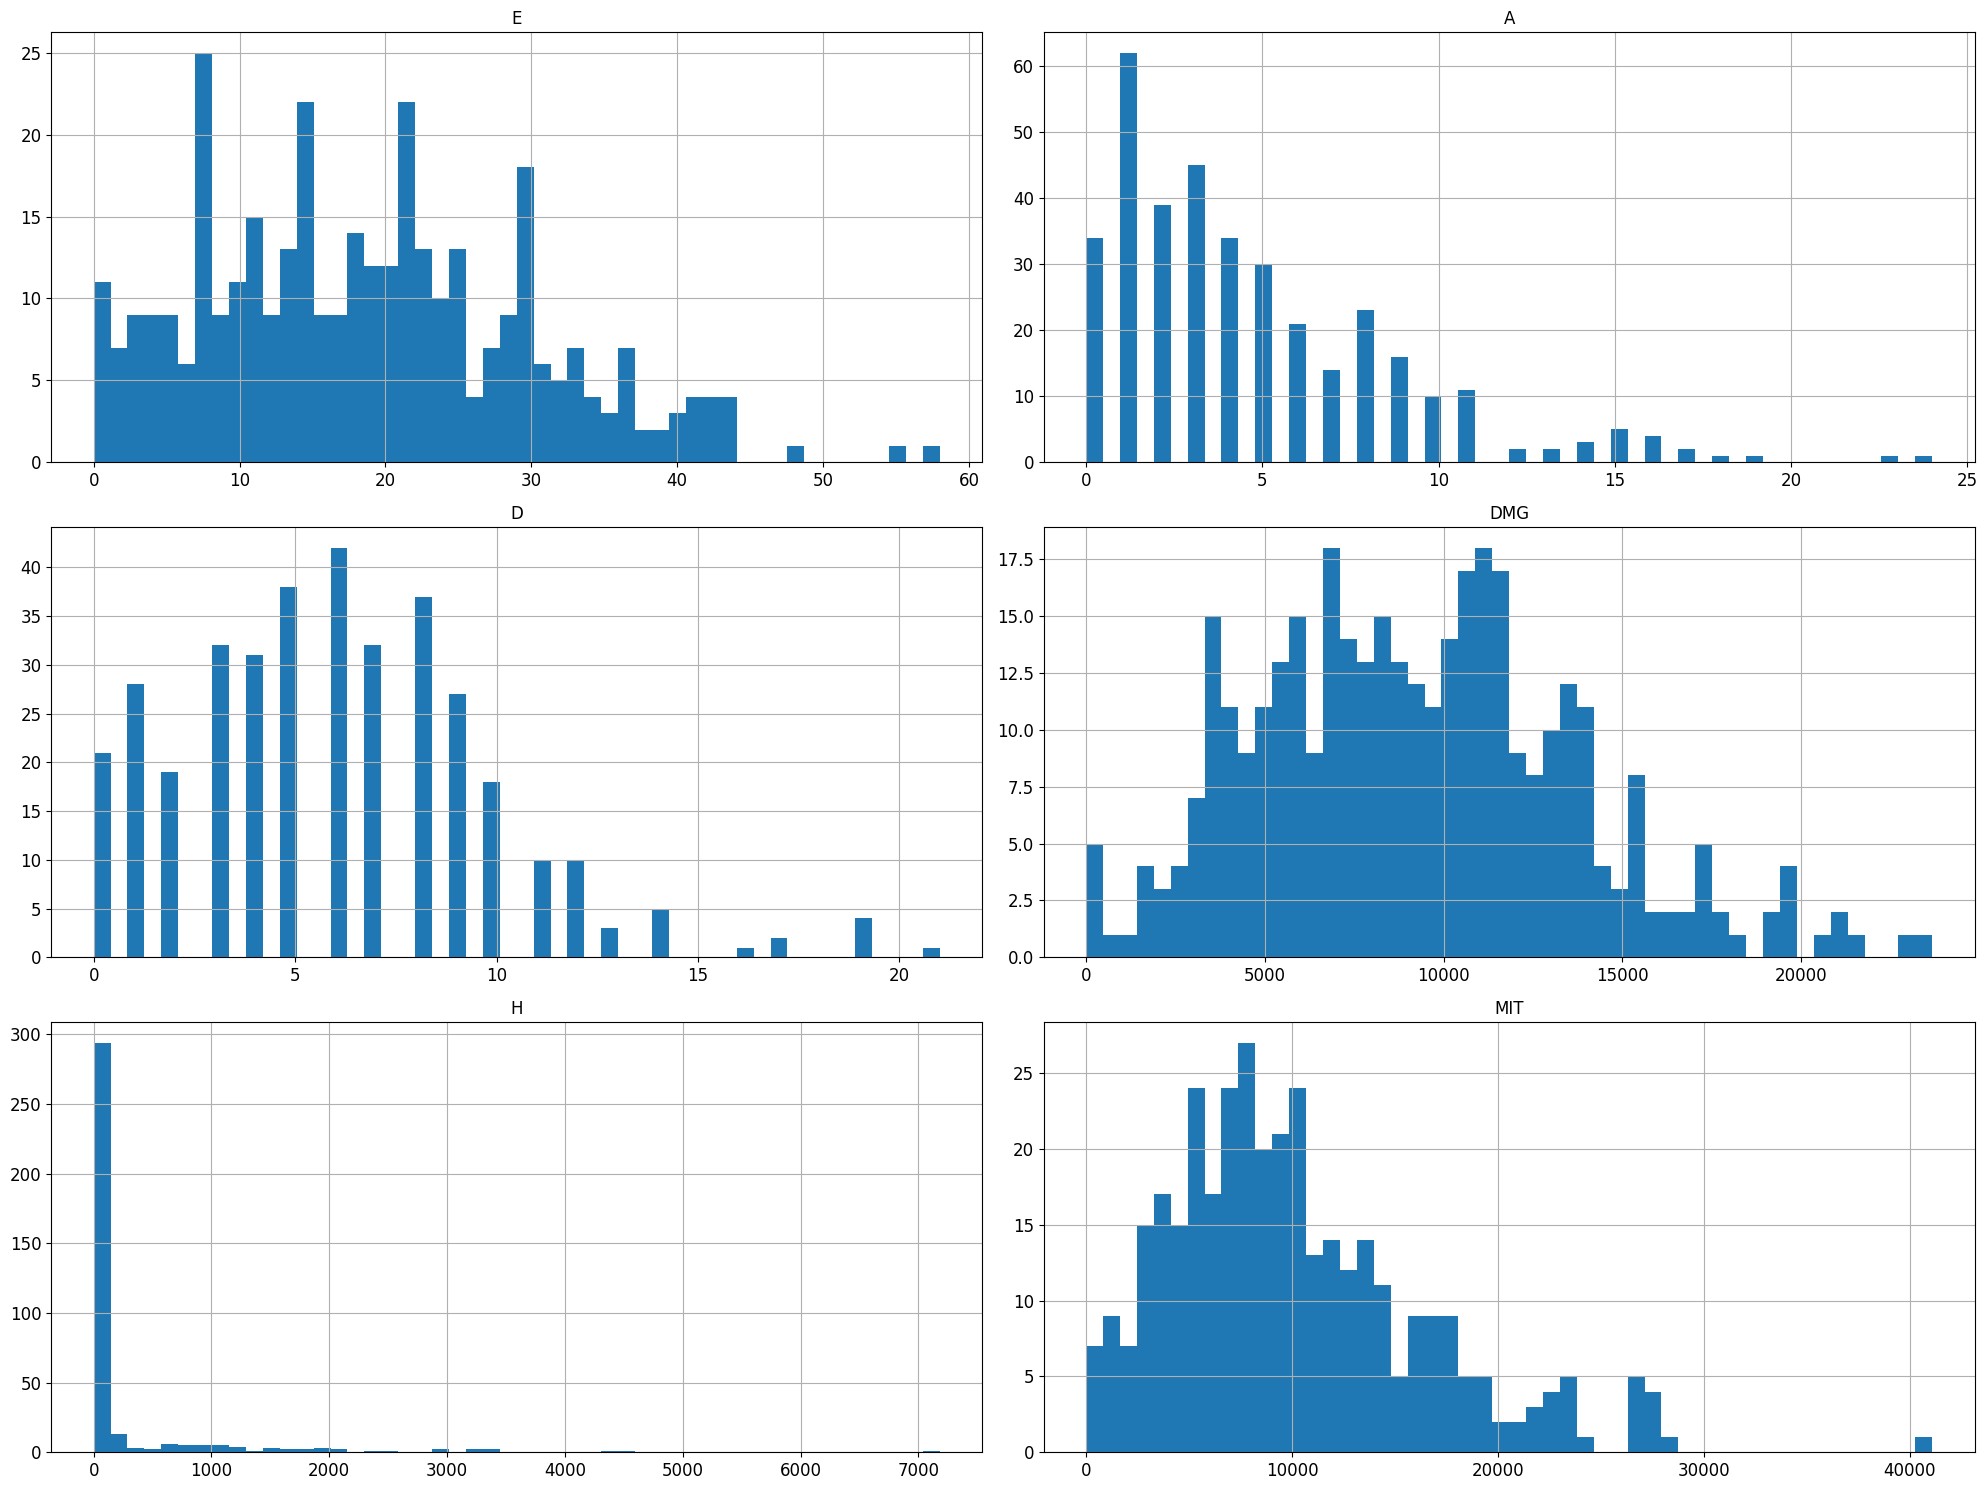

In [6]:
tank.hist(bins=50, figsize=(20, 15))
save_fig('tank_hist')
plt.show()

그림 저장:damage_hist


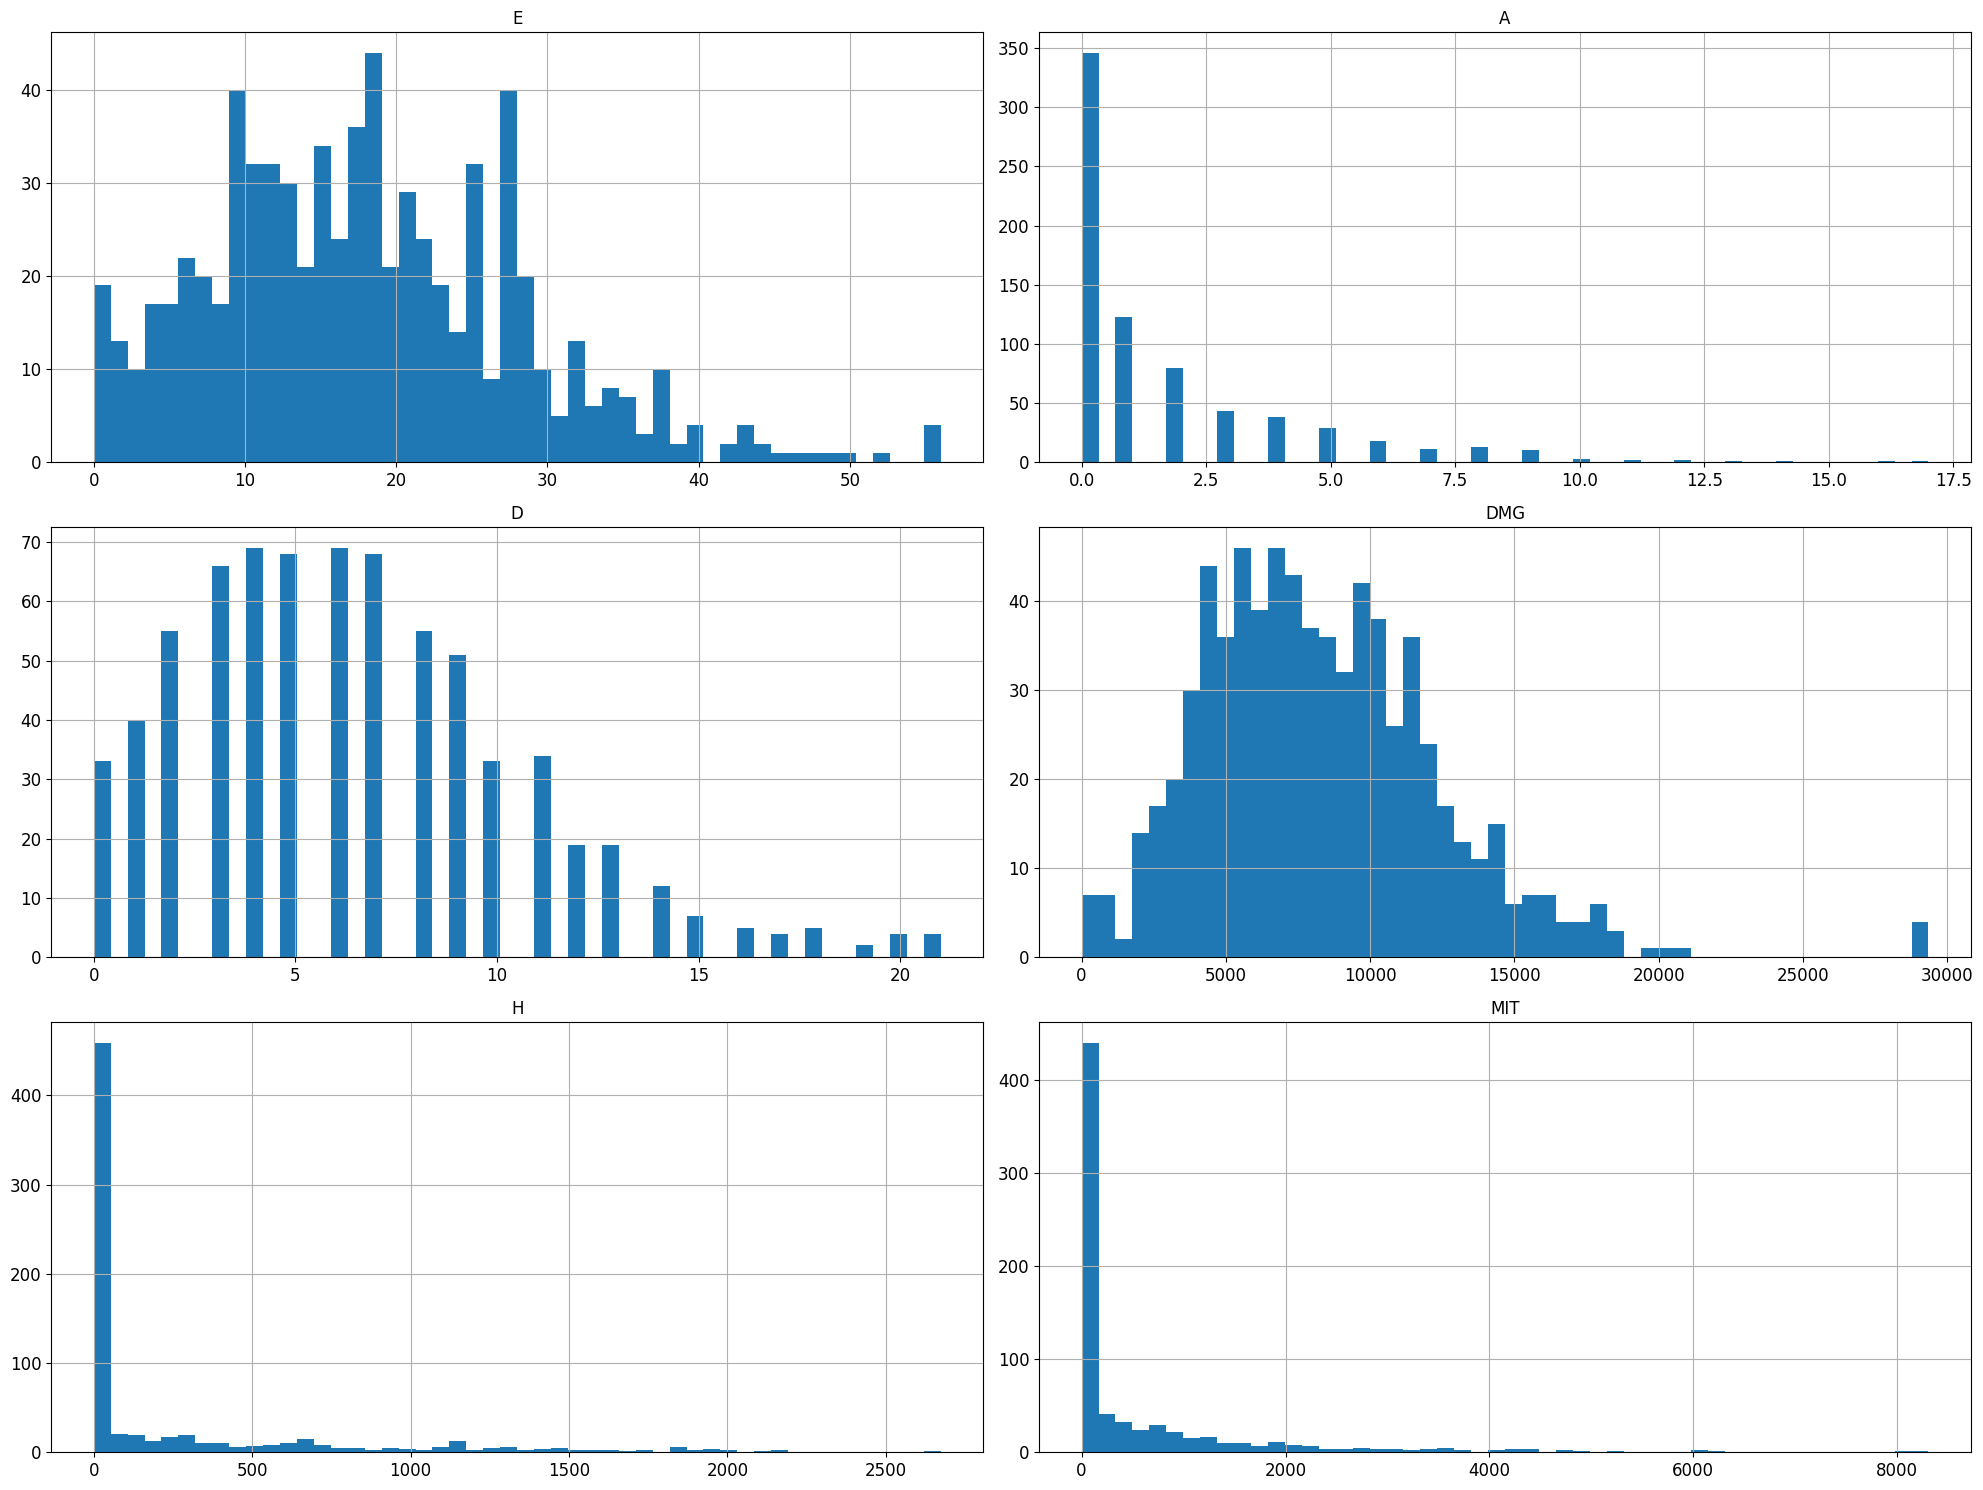

In [7]:
damage.hist(bins=50, figsize=(20, 15))
save_fig('damage_hist')
plt.show()

그림 저장:support_hist


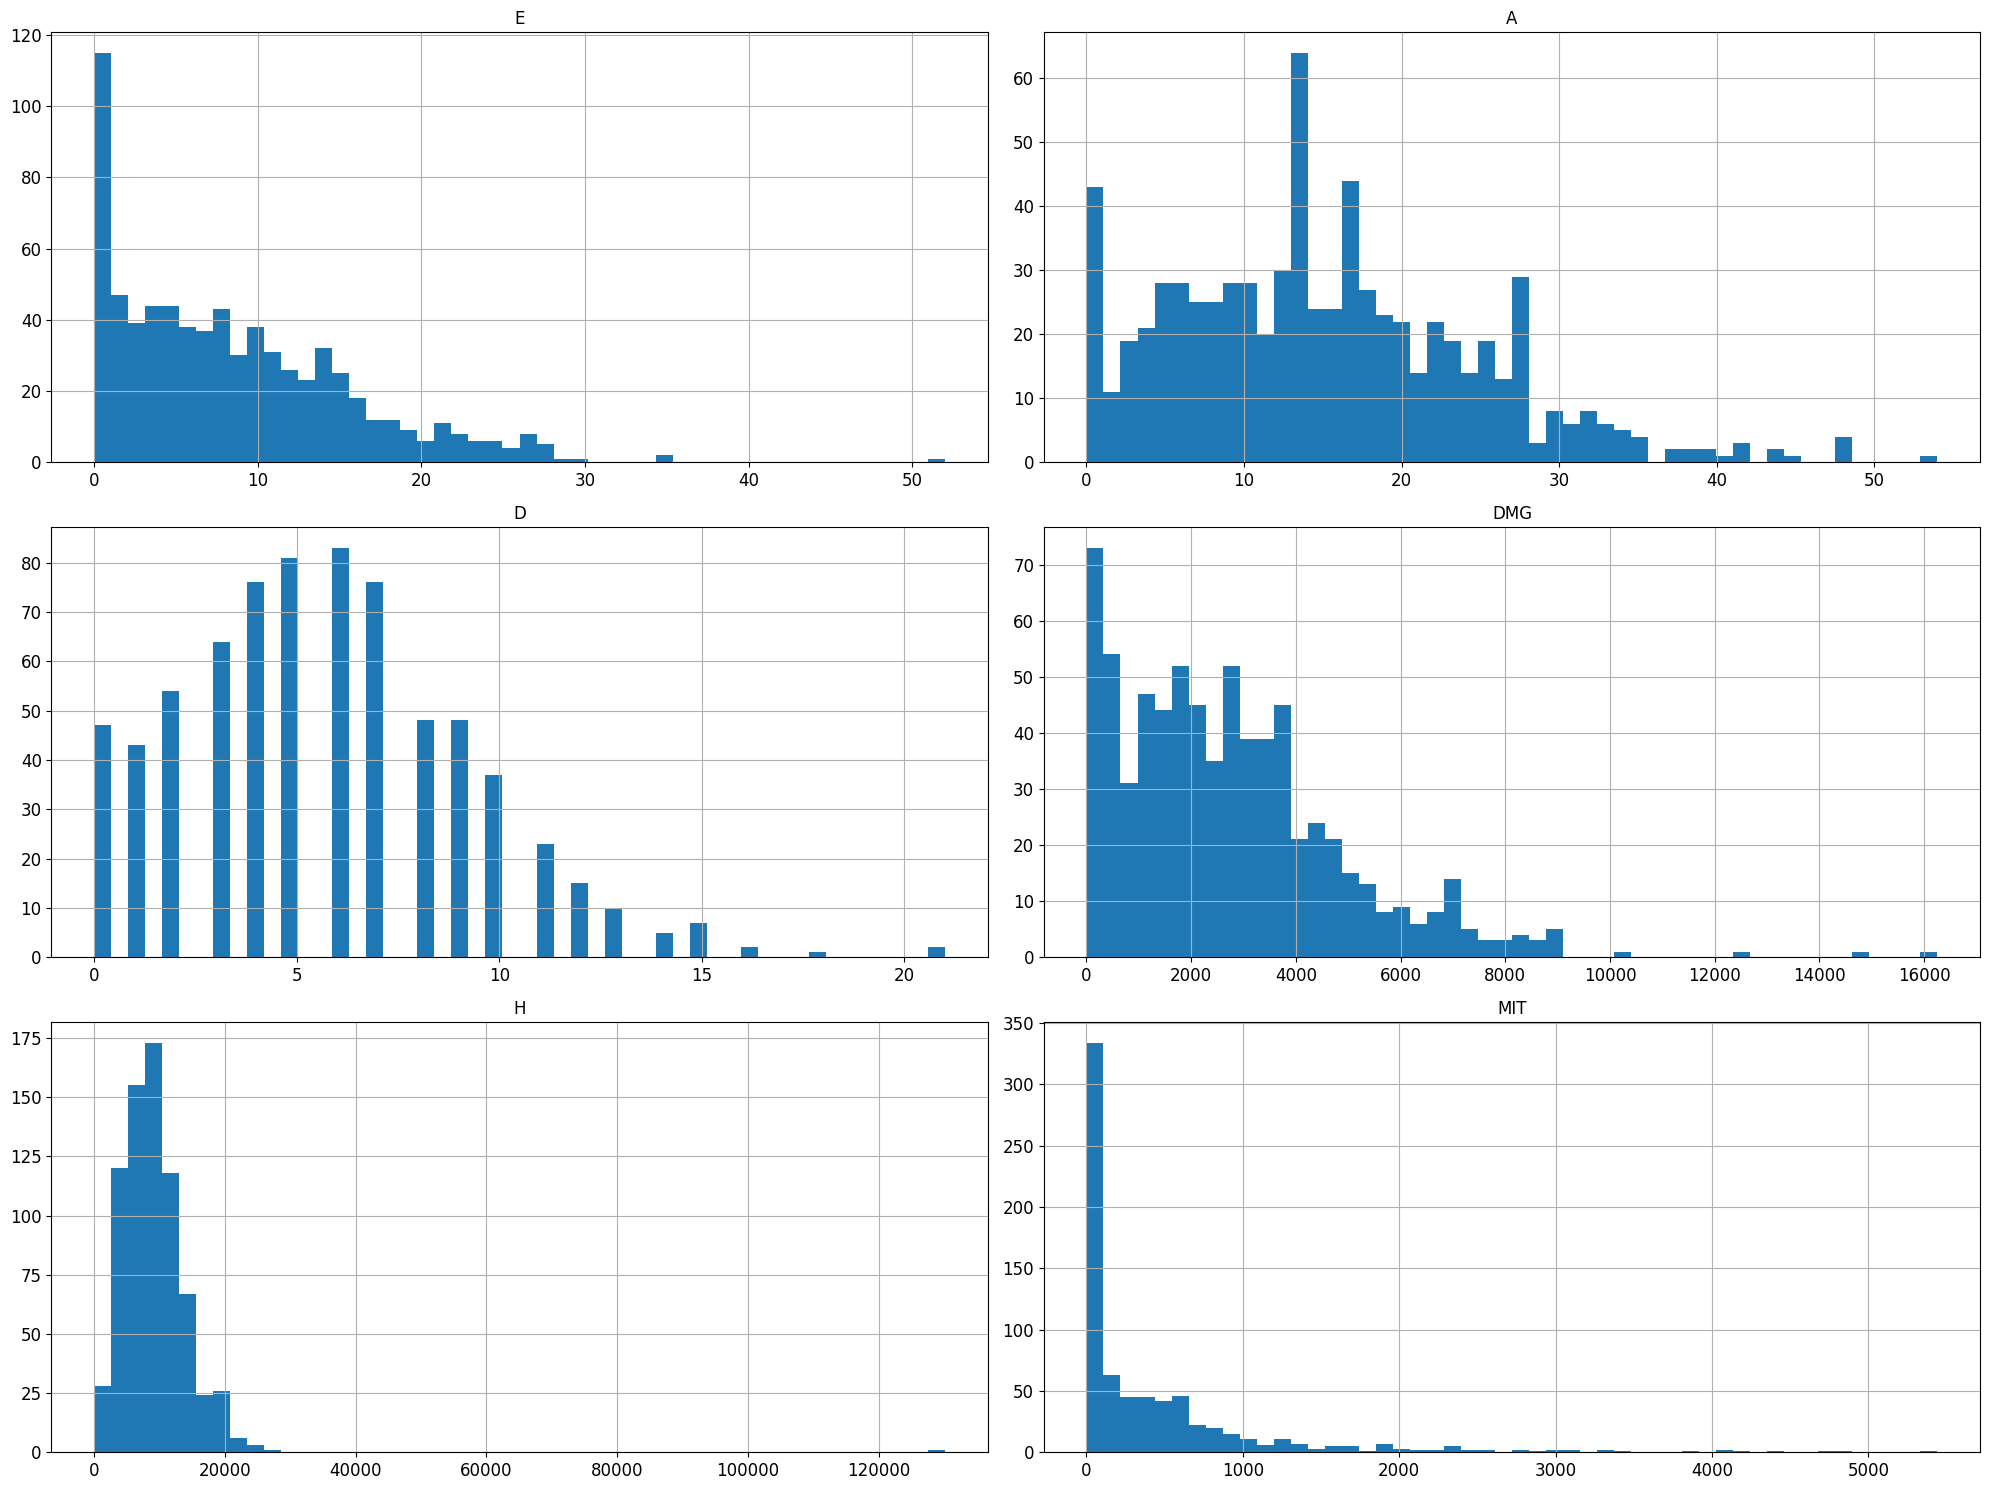

In [8]:
support.hist(bins=50, figsize=(20, 15))
save_fig('support_hist')
plt.show()

In [9]:
from sklearn import utils

index = scoreboards.index
scoreboards = scoreboards.loc[utils.shuffle(range(len(index) // players))]
scoreboards

E   A   D    DMG      H    MIT     GAME
68 0   4   1   3   2329      0   1463   DEFEAT
   1   4   0   2   1656      0      0   DEFEAT
   2   2   0   7   4130   1069      0   DEFEAT
   3   4   3   3   1139   1976      0   DEFEAT
   4   4   1   6   1889   2582     76   DEFEAT
...   ..  ..  ..    ...    ...    ...      ...
23 5  41  16  14  24682      0  25529  VICTORY
   6  45  12  11  19804   2748      0  VICTORY
   7  47   0  16  26666   2566    142  VICTORY
   8  19  44   9   6281  24081      0  VICTORY
   9  31  28   8   9749  14991    592  VICTORY

[3610 rows x 7 columns]

In [10]:
X = scoreboards.drop('GAME', axis=1)
y = scoreboards['GAME'][::players].copy()

In [11]:
from sklearn import preprocessing
import joblib

scaler = preprocessing.MinMaxScaler().fit(X)
joblib.dump(scaler, 'scaler.joblib')
X = pd.DataFrame(scaler.transform(X), index, X.columns)
X

E         A         D       DMG         H       MIT
0   0  0.068966  0.018519  0.142857  0.079342  0.000000  0.034959
    1  0.068966  0.000000  0.095238  0.056415  0.000000  0.000000
    2  0.034483  0.000000  0.333333  0.140696  0.008212  0.000000
    3  0.068966  0.055556  0.142857  0.038802  0.015180  0.000000
    4  0.068966  0.018519  0.285714  0.064352  0.019835  0.001816
...         ...       ...       ...       ...       ...       ...
360 5  0.706897  0.296296  0.666667  0.840839  0.000000  0.610027
    6  0.775862  0.222222  0.523810  0.674661  0.021110  0.000000
    7  0.810345  0.000000  0.761905  0.908428  0.019712  0.003393
    8  0.327586  0.814815  0.428571  0.213974  0.184991  0.000000
    9  0.534483  0.518519  0.380952  0.332118  0.115161  0.014146

[3610 rows x 6 columns]

In [12]:
features = X.shape[-1]
X = X.values.reshape(-1, players * features)
print(X.shape)
print(y.shape)

(361, 60)
(361,)


In [13]:
from sklearn import ensemble, linear_model, neighbors, neural_network, svm, tree, model_selection
import operator

estimators = (
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(n_jobs=-1),
    ensemble.ExtraTreesClassifier(n_jobs=-1),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(n_jobs=-1),
    ensemble.HistGradientBoostingClassifier(),
    linear_model.LogisticRegression(n_jobs=-1),
    linear_model.LogisticRegressionCV(max_iter=800, n_jobs=-1),
    linear_model.PassiveAggressiveClassifier(n_jobs=-1),
    linear_model.Perceptron(n_jobs=-1),
    linear_model.RidgeClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(n_jobs=-1),
    neighbors.KNeighborsClassifier(n_jobs=-1),
    neighbors.RadiusNeighborsClassifier(2., n_jobs=-1),
    neighbors.NearestCentroid(),
    neural_network.MLPClassifier(max_iter=1600),
    svm.LinearSVC(dual='auto'),
    svm.NuSVC(nu=.0625),
    svm.SVC(),
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier()
)
scores = [(estimator, model_selection.cross_val_score(estimator, X, y, n_jobs=-1).mean()) for estimator in estimators]
scores.sort(key=operator.itemgetter(1), reverse=True)
scores

[(RandomForestClassifier(n_jobs=-1), 0.9002283105022831),
 (SVC(), 0.8974885844748858),
 (ExtraTreesClassifier(n_jobs=-1), 0.8918949771689497),
 (LogisticRegressionCV(max_iter=800, n_jobs=-1), 0.8836757990867581),
 (PassiveAggressiveClassifier(n_jobs=-1), 0.8835616438356164),
 (KNeighborsClassifier(n_jobs=-1), 0.8808599695585997),
 (LinearSVC(dual='auto'), 0.8781202435312025),
 (GradientBoostingClassifier(), 0.8780821917808218),
 (LogisticRegression(n_jobs=-1), 0.8780441400304413),
 (HistGradientBoostingClassifier(), 0.8725646879756468),
 (RidgeClassifier(), 0.8697488584474886),
 (RidgeClassifierCV(), 0.8697488584474886),
 (SGDClassifier(n_jobs=-1), 0.8670091324200913),
 (NuSVC(nu=0.0625), 0.8642694063926941),
 (MLPClassifier(max_iter=1600), 0.8503424657534246),
 (BaggingClassifier(n_jobs=-1), 0.8502663622526636),
 (Perceptron(n_jobs=-1), 0.8476027397260275),
 (NearestCentroid(), 0.8198630136986299),
 (ExtraTreeClassifier(), 0.792123287671233),
 (DecisionTreeClassifier(), 0.75597412480

In [15]:
defeats = len(defeat) // players
defeats_draws = defeats + len(draw) // players


def find_file(index):
    index += 1
    if index <= defeats:
        return f'DEFEAT ({index})'
    elif index <= defeats_draws:
        index -= defeats
        return f'DRAW ({index})'
    else:
        index -= defeats_draws
        return f'VICTORY ({index})'

In [16]:
for estimator, _ in scores:
    estimator = estimator.fit(X, y)
    if hasattr(estimator, 'feature_importances_'):
        print(estimator)
        importances = estimator.feature_importances_.reshape(-1, features)
        tanks, damages, supports = [0, 5], [1, 2, 6, 7], [3, 4, 8, 9]
        importances[tanks] = importances[tanks].sum(0) / 2
        importances[damages] = importances[damages].sum(0) / 4
        importances[supports] = importances[supports].sum(0) / 4
        joblib.dump(importances, 'importances.joblib')

        importances_tanks = importances[tanks].sum(0)
        importances_damages = importances[damages].sum(0) / 2
        importances_supports = importances[supports].sum(0) / 2

        titles = '처치', '도움', '죽음', '피해', '치유', '경감'

        print('\n**특성 중요도**')
        for importance, title in sorted(zip(importances.sum(0), titles), reverse=True):
            print(f'{title}: {importance * 100:.0f}%')

        print('\n**1인 돌격 특성 중요도**')
        for importance, title in sorted(zip(importances_tanks, titles), reverse=True):
            print(f'{title}: {importance * 100:.0f}%')

        print('\n**1인 공격 특성 중요도**')
        for importance, title in sorted(zip(importances_damages, titles), reverse=True):
            print(f'{title}: {importance * 100:.0f}%')

        print('\n**1인 지원 특성 중요도**')
        for importance, title in sorted(zip(importances_supports, titles), reverse=True):
            print(f'{title}: {importance * 100:.0f}%')

        print('\n**1인 역할 중요도**')
        for importance, title in sorted(
                zip(
                    (importances_tanks.sum(), importances_damages.sum(), importances_supports.sum()), ('돌격', '공격', '지원')
                ),
                reverse=True
        ):
            print(f'{title}: {importance * 100:.0f}%')

        break

RandomForestClassifier(n_jobs=-1)

**특성 중요도**
처치: 32%
죽음: 28%
도움: 18%
피해: 10%
치유: 6%
경감: 6%

**1인 돌격 특성 중요도**
처치: 12%
죽음: 12%
도움: 3%
피해: 3%
경감: 2%
치유: 0%

**1인 공격 특성 중요도**
처치: 8%
죽음: 4%
피해: 2%
치유: 1%
도움: 1%
경감: 1%

**1인 지원 특성 중요도**
도움: 7%
죽음: 4%
처치: 2%
치유: 2%
피해: 2%
경감: 1%

**1인 역할 중요도**
돌격: 32%
지원: 18%
공격: 17%


In [39]:
index = 0
contributions = X[index].reshape(players, features).copy()
contributions[:, 2] = 1 - contributions[:, 2]
contributions *= importances
contributions = contributions.sum(1)
contributions[tanks] *= 2 / contributions[tanks].sum()
contributions[damages] *= 4 / contributions[damages].sum()
contributions[supports] *= 4 / contributions[supports].sum()

print('<Contributions>')
print(f'TEAM 1:', end='')
for contribution in contributions[:5]:
    print(f' {contribution:.2f}', end='')
print(f'\nTEAM 2:', end='')
for contribution in contributions[5:]:
    print(f' {contribution:.2f}', end='')

original_index = y.index[index][0]
print(f'\n\n{find_file(original_index)}')
print(scoreboards.loc[original_index])

<Contributions>
TEAM 1: 0.91 0.93 0.71 0.92 0.75
TEAM 2: 1.09 1.24 1.11 1.15 1.19

DEFEAT (69)
    E   A  D   DMG     H   MIT     GAME
0   4   1  3  2329     0  1463   DEFEAT
1   4   0  2  1656     0     0   DEFEAT
2   2   0  7  4130  1069     0   DEFEAT
3   4   3  3  1139  1976     0   DEFEAT
4   4   1  6  1889  2582    76   DEFEAT
5  10   1  2  2765     0  8228  VICTORY
6  12   3  2  4637     0     0  VICTORY
7  10   1  3  3665     0     0  VICTORY
8   2   7  0   925  4664   338  VICTORY
9   8  10  2  1871  3224     0  VICTORY


In [37]:
from tensorflow.keras import backend, layers
from tensorflow import keras

backend.clear_session()
model = keras.Sequential()
model.add(layers.Dense(300, 'relu', input_shape=[60]))
model.add(layers.Dense(100, 'relu'))
model.add(layers.Dense(3, 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               18300     
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 3)                 303       
                                                                 
Total params: 48703 (190.25 KB)
Trainable params: 48703 (190.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
from tensorflow.keras import optimizers, callbacks

encoder = preprocessing.LabelEncoder()
model.compile('sgd', 'sparse_categorical_crossentropy', ['accuracy'])
history = model.fit(
    X,
    encoder.fit_transform(y),
    epochs=100,
    verbose=2,
    callbacks=[callbacks.EarlyStopping(patience=10, restore_best_weights=True)],
    validation_split=.1
)
history.history['val_loss'][-11], history.history['val_accuracy'][-11]

Epoch 1/100
11/11 - 1s - loss: 1.0385 - accuracy: 0.4784 - val_loss: 0.9741 - val_accuracy: 0.5405 - 556ms/epoch - 51ms/step
Epoch 2/100
11/11 - 0s - loss: 0.9713 - accuracy: 0.6358 - val_loss: 0.9159 - val_accuracy: 0.5946 - 72ms/epoch - 7ms/step
Epoch 3/100
11/11 - 0s - loss: 0.9227 - accuracy: 0.7284 - val_loss: 0.8724 - val_accuracy: 0.6486 - 70ms/epoch - 6ms/step
Epoch 4/100
11/11 - 0s - loss: 0.8847 - accuracy: 0.7778 - val_loss: 0.8386 - val_accuracy: 0.7297 - 67ms/epoch - 6ms/step
Epoch 5/100
11/11 - 0s - loss: 0.8520 - accuracy: 0.8333 - val_loss: 0.8087 - val_accuracy: 0.7027 - 68ms/epoch - 6ms/step
Epoch 6/100
11/11 - 0s - loss: 0.8238 - accuracy: 0.8457 - val_loss: 0.7827 - val_accuracy: 0.7568 - 68ms/epoch - 6ms/step
Epoch 7/100
11/11 - 0s - loss: 0.8000 - accuracy: 0.8580 - val_loss: 0.7632 - val_accuracy: 0.8649 - 64ms/epoch - 6ms/step
Epoch 8/100
11/11 - 0s - loss: 0.7779 - accuracy: 0.8611 - val_loss: 0.7445 - val_accuracy: 0.8919 - 56ms/epoch - 5ms/step
Epoch 9/100
11

(0.4671153426170349, 0.8108108043670654)

In [20]:
import numpy as np

probas = model.predict(X)
predictions = encoder.inverse_transform(np.argmax(probas, 1))
for i, (label, prediction) in enumerate(zip(y, predictions)):
    if label != prediction:
        index = y.index[i][0]
        print(
            f'\n{find_file(index)} - 패 {probas[i][0] * 100:.0f}% - 무 {probas[i][1] * 100:.0f}% - 승 {probas[i][2] * 100:.0f}%'
        )
        print(scoreboards.loc[index])

12/12 [==============================] - 0s 1ms/step

DEFEAT (156) - 패 41% - 무 4% - 승 55%
    E   A  D   DMG      H   MIT     GAME
0  19   3  5  8889      0  4876   DEFEAT
1  15   0  2  6605     33   273   DEFEAT
2  11   2  6  5815    486     0   DEFEAT
3  13   6  4  5963   6442     0   DEFEAT
4   1  20  3    60  11359     0   DEFEAT
5  14   2  3  6561      0  4412  VICTORY
6  15   1  8  6371    893   402  VICTORY
7   9   4  7  7314      0  1785  VICTORY
8   4   8  5  1343   9564   253  VICTORY
9  15   6  3  6721   7679     0  VICTORY

DRAW (4) - 패 27% - 무 20% - 승 53%
   E  A   D   DMG     H  MIT  GAME
0  3  1   0   437     0  398  DRAW
1  1  0   0   384     0    0  DRAW
2  4  1   0   663     0    0  DRAW
3  0  0   0     0   675    0  DRAW
4  0  2   0    26  1110    0  DRAW
5  0  0   0   437     0  502  DRAW
6  0  0   1   236     0    0  DRAW
7  0  0   2  1229     0    0  DRAW
8  0  0   2   260   113    0  DRAW
9  0  0  21     0     0    0  DRAW

VICTORY (77) - 패 85% - 무 2% - 승 13%
   